In [1]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import numpy as np
np.set_printoptions(suppress=True)

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

Removing mean and scaling variance
===================================

In [2]:
from sklearn.preprocessing import StandardScaler

1) Instantiate the model

In [3]:
scaler = StandardScaler()

2) Fit using only the data.

In [4]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

3) `transform` the data (not `predict`).

In [7]:
X_train_scaled = scaler.transform(X_train)

In [8]:
X_train.shape

(1347, 64)

In [9]:
X_train_scaled.shape

(1347, 64)

The transformed version of the data has the mean removed:

In [10]:
X_train_scaled.mean(axis=0)

array([ 0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
        0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,
        0.,  0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.])

In [11]:
X_train_scaled.std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [15]:
X_test_transformed = scaler.transform(X_test)

In [16]:
X_test_transformed.mean(axis=0)

array([ 0.        , -0.0185469 , -0.12151623, -0.04937009, -0.04388394,
        0.01695373,  0.05721687,  0.10805979, -0.06827569, -0.07165545,
       -0.07480818,  0.07914056, -0.11893963, -0.09042479,  0.01356351,
        0.12108323, -0.05156009, -0.0664821 ,  0.04183864,  0.03425038,
       -0.0950457 , -0.08617135, -0.00439744, -0.02271016, -0.03856149,
        0.02797051,  0.01916963, -0.12435309, -0.11167065, -0.08623923,
       -0.05933789, -0.05457478,  0.        ,  0.05850534,  0.03454943,
       -0.06414198, -0.0492194 ,  0.00968195, -0.0084997 ,  0.        ,
       -0.01910348,  0.05185095,  0.12849999, -0.02236205, -0.06332347,
        0.04174935,  0.03544928,  0.04835841, -0.04093478,  0.06799369,
        0.07803084, -0.04163881, -0.06693021,  0.05149497,  0.08139777,
        0.01248225, -0.02725696, -0.02143361, -0.09513318, -0.04273043,
        0.05912352,  0.04255323, -0.0279485 , -0.06664023])

In [17]:
scaler.inverse_transform(X_test_transformed)

array([[  0.,   0.,   1., ...,  14.,   2.,   0.],
       [  0.,   0.,   2., ...,  15.,   4.,   0.],
       [  0.,   0.,   6., ...,  11.,   0.,   0.],
       ..., 
       [  0.,   0.,   5., ...,  11.,   0.,   0.],
       [  0.,   0.,   2., ...,   5.,   0.,   0.],
       [  0.,   0.,   1., ...,  14.,   6.,   0.]])

## Principal Component Analysis
=============================

0) Import the model

In [23]:
from sklearn.decomposition import PCA

1) Instantiate the model

In [24]:
pca = PCA(n_components=2)

2) Fit to training data

In [25]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

3) Transform to lower-dimensional representation

In [26]:
print(X.shape)
X_pca = pca.transform(X)
X_pca.shape

(1797, 64)


(1797, 2)

Visualize
----------

<IPython.core.display.Javascript object>


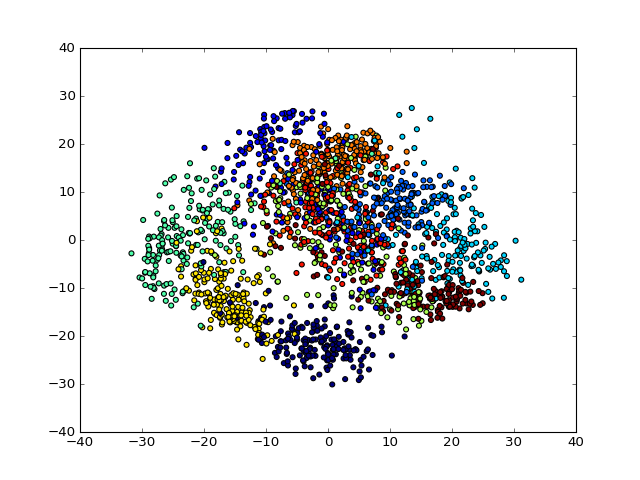

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold Learning
==================

In [28]:
from sklearn.manifold import Isomap
isomap = Isomap()

In [29]:
X_isomap = isomap.fit_transform(X)

<IPython.core.display.Javascript object>


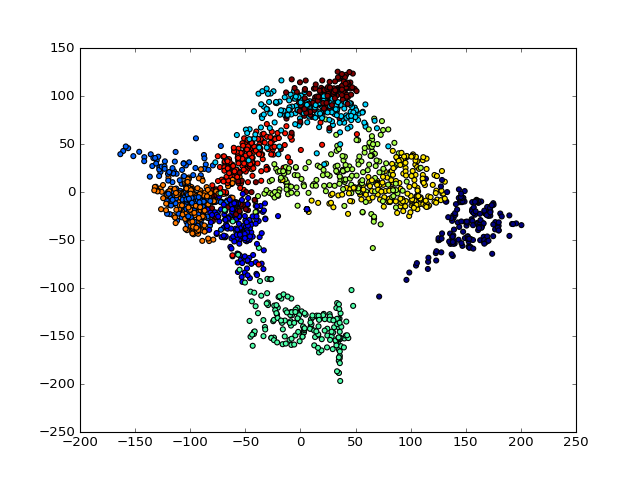

In [30]:
plt.figure()
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

# Exercises
Visualize the digits dataset using the TSNE algorithm from the sklearn.manifold module (it runs for a couple of seconds).


In [42]:
# %load solutions/digits_tsne.py
from sklearn.manifold import TSNE
TSNE_model = TSNE(n_components=2)
X_TSNE = TSNE_model.fit_transform(X)

(1797, 2)


<IPython.core.display.Javascript object>


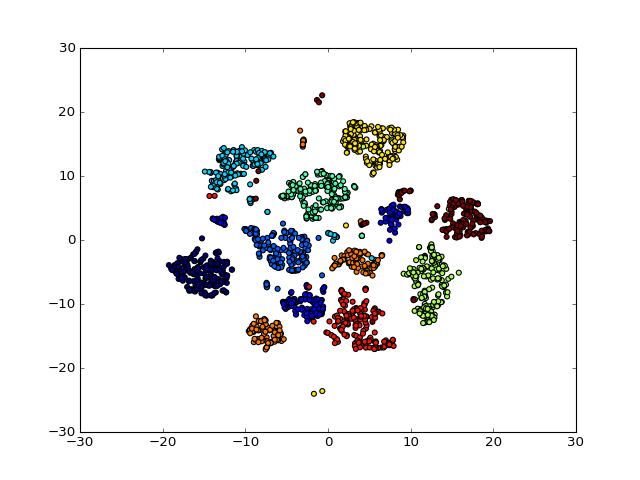

In [43]:
print(X_TSNE.shape)
plt.figure()
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=y)